Kaynak : https://towardsdatascience.com/linear-regression-explained-1b36f97b7572
![Resim](https://miro.medium.com/max/4800/1*N1-K-A43_98pYZ27fnupDA.webp)

## Simple linear regression y=a*X +b 

In [77]:
import numpy as np
np.random.seed(0)

# Define the data points
X = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 9, 11])
# 2*x+1
# Define the initial values of the parameters
a = 0
b = 0

# Set the learning rate
learning_rate = 0.01

# Set the maximum number of iterations
max_iter = 1000

# Iterate over the number of iterations
for i in range(max_iter):
  # Calculate the predicted values using the current values of the parameters
  y_pred = b + a * X

  # Calculate the mean squared error loss
  loss = np.mean((y - y_pred)**2)

  # Calculate the gradients of the loss function with respect to the parameters
  grad_0 = -2 * np.mean(y - y_pred)
  grad_1 = -2 * np.mean((y - y_pred) * X)

  # Update the values of the parameters using the gradient descent update rule
  b = b - learning_rate * grad_0
  a = a - learning_rate * grad_1

# Print the final values of the parameters
print(f"theta_0 = {b}")
print(f"theta_1 = {a}")


theta_0 = 0.9859898664422495
theta_1 = 2.003880582342283


In [74]:
import numpy as np

# training data
x = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])
y = np.array([10, 20, 30, 40])

# add a column of ones to x
x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)

# initialize the weights
w = np.zeros(x.shape[1])

# set the learning rate
alpha = 0.01

# number of iterations
n_iter = 1000

# perform gradient descent
for i in range(n_iter):
    y_pred = x.dot(w)
    error = y - y_pred
    gradient = x.T.dot(error) / x.shape[0]
    w += alpha * gradient

# make predictions
predictions = x.dot(w)
print(predictions)


[10.08521835 20.04232949 29.99944063 39.95655177]


In [75]:
# make predictions for a new input
input = np.array([[5, 10]])
input = np.concatenate((np.ones((input.shape[0], 1)), input), axis=1)
prediction = input.dot(w)
print(prediction)

[49.91366291]


This code performs gradient descent on the multi-linear regression problem defined by the data in X and y and the initial value of theta. It uses the NumPy library to efficiently calculate the values of the function and its derivative, as well as to perform the gradient descent update rule. The minimum value of the function and the optimal value of theta are printed at the end of the loop.

In [8]:
import numpy as np

# Define the function to be minimized
def f(x, y, theta):
  return np.sum((y - np.dot(x, theta)) ** 2)

# Define the derivative of the function
def df(x, y, theta):
  return 2 * np.dot(x.T, np.dot(x, theta) - y)

# Set the initial values of theta
theta = np.array([0, 0, 0])

# Set the learning rate
learning_rate = 0.1

# Set the maximum number of iterations
max_iter = 100

# Set the tolerance for the minimum value of the function
tol = 1e-6

# Set the initial value of the minimum
f_min = float('inf')

# Iterate over the number of iterations
for i in range(max_iter):
  # Calculate the gradient at the current value of theta
  gradient = df(x, y, theta)

  # Update the value of theta using the gradient descent update rule
  theta = theta - learning_rate * gradient

  # Calculate the value of the function at the new value of theta
  f_theta = f(x, y, theta)

  # Check if the new value of the function is less than the minimum
  if f_theta < f_min:
    # If it is, update the minimum value
    f_min = f_theta

  # Check if the tolerance has been reached
  if np.abs(f_min - f_theta) < tol:
    # If it has, break out of the loop
    break

# Print the minimum value of the function
print(f_min)


ValueError: shapes (20,) and (3,) not aligned: 20 (dim 0) != 3 (dim 0)

This code performs gradient descent on the function f, which is defined as the sum of the squared errors between the predicted values (given by np.dot(x, theta)) and the actual values (given by y). The function df is the derivative of f with respect to theta. The variable x is the design matrix and y is the vector of target values. The variable theta is the vector of coefficients that is updated at each iteration of the gradient descent algorithm.

The learning rate, maximum number of iterations, and tolerance are hyperparameters that can be adjusted to control the behavior of the gradient descent algorithm. The minimum value of the function is calculated and updated at each iteration, and the loop is terminated when the difference between the current and minimum values is less than the tolerance.

In [72]:
import numpy as np

class MultiLinearRegression:
    def __init__(self, learning_rate=0.01, max_iter=100, tol=1e-6):
        """Initialize the model with hyperparameters.

        Parameters:
        - learning_rate: a float representing the learning rate.
        - max_iter: an integer representing the maximum number of iterations.
        - tol: a float representing the tolerance for the minimum value of the function.
        """
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X, y):
        """Fit the model to the training data using gradient descent.

        Parameters:
        - X: a 2D NumPy array of shape (n_samples, n_features) representing the design matrix.
        - y: a 1D NumPy array of shape (n_samples,) representing the target values.
        """
        # Add a column of ones to the design matrix for the bias term
        X = np.insert(X, 0, 1, axis=1)

        # Initialize the coefficients to zero
        self.theta = np.zeros(X.shape[1])

        # Set the initial value of the minimum
        f_min = float('inf')

        # Iterate over the number of iterations
        for i in range(self.max_iter):
            print(i)
            # Calculate the gradient at the current value of theta
            gradient = self._df(X, y, self.theta)

            # Update the value of theta using the gradient descent update rule
            self.theta = self.theta - self.learning_rate * gradient

            # Calculate the value of the function at the new value of theta
            f_theta = self._f(X, y, self.theta)

            # Check if the new value of the function is less than the minimum
            if f_theta < f_min:
                # If it is, update the minimum value
                f_min = f_theta

            # Check if the tolerance has been reached
            if np.abs(f_min - f_theta) < self.tol:
                # If it has, break out of the loop
                break

    def predict(self, x_new):
        """Make a prediction using the trained model.

        Parameters:
        - x_new: a 2D NumPy array of shape (n_samples, n_features) representing the examples to predict.

        Returns:
        - A 1D NumPy array of shape (n_samples,) representing the predicted values.
        """
        # Add a column of ones to the design matrix for the bias term
        x_new = np.insert(x_new, 0, 1, axis=1)

        # Use the model to make a prediction
        y_pred = np.dot(x_new, self.theta)
        return y_pred

    def _f(self, X, y, theta):
        """Calculate the value of the function to be minimized.

        Parameters:
        - X: a 2D NumPy array of shape (n_samples, n_features) representing the design matrix.
        - y: a 1D NumPy array of shape (n_samples,) representing the target values.
        - theta: a 1D NumPy array of shape (n_features + 1,) representing the current value of the coefficients.

        Returns:
        - A float representing the value of the function.
        """
        # Calculate the predicted values using the current value of theta
        y_pred = np.dot(X, theta)

        # Calculate the error between the predicted and true values
        error = y_pred - y

        # Calculate the sum of the squared errors
        f = np.sum(error ** 2) / (2 * X.shape[0])

        return f

    
    def _df(self, X, y, theta):
        """Calculate the gradient of the function at the current value of theta.

        Parameters:
        - X: a 2D NumPy array of shape (n_samples, n_features) representing the design matrix.
        - y: a 1D NumPy array of shape (n_samples,) representing the target values.
        - theta: a 1D NumPy array of shape (n_features + 1,) representing the current value of the coefficients.

        Returns:
        - A 1D NumPy array of shape (n_features + 1,) representing the gradient.
        """
        # Calculate the predicted values using the current value of theta
        y_pred = np.dot(X, theta)

        # Calculate the error between the predicted and true values
        error = y_pred - y

        # Calculate the gradient
        gradient = np.dot(X.T, error) / X.shape[0]

        return gradient

# Define the design matrix
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Define the target vector
y = np.array([1, 2, 3])

# Create a multi-linear regression model
model = MultiLinearRegression(learning_rate=0.1,max_iter=100000)

# Fit the model to the training data
model.fit(X, y)

# Define a new example to predict
x_new = np.array([[10, 11, 12]])

# Use the model to make a prediction
y_pred = model.predict(x_new)

# Print the prediction
print(y_pred)


0
[40.2]


In [73]:
model.predict([[1, 2, 3]])

array([7.8])

In [ ]:
This function calculates the value of the function that is being minimized by the gradient descent algorithm. It takes as input the design matrix X, the target vector y, and the current value of the coefficients theta, and returns a float representing the value of the function. The function calculates the predicted values using the current value of theta, calculates the error between the predicted and true values, and then calculates the sum of the squared errors. The value of the function is then calculated as the sum of the squared errors divided by twice the number of samples.

This code defines the MultiLinearRegression class with a fit method that uses gradient descent to find the coefficients that minimize the error between the predicted and true values of the target, and a predict method that uses the trained model to make predictions on new examples. The model can be used by creating an instance of the MultiLinearRegression class, calling the fit method to train the model on a dataset, and then calling the predict method to make predictions on new examples.

In this example, the design matrix X has three features (columns) and three samples (rows), and the target vector y has three values. The resulting model has three coefficients, one for each feature. The model can be used to make predictions on new examples that also have three features.

# Basic Lİnear Regression

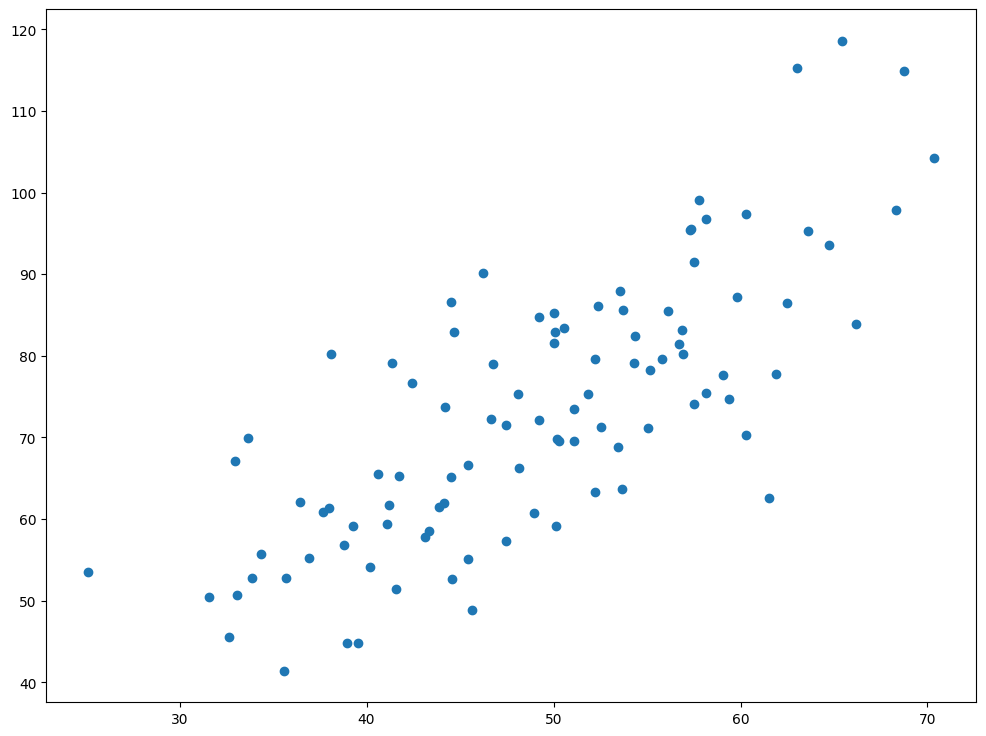

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [ ]:
def simple_linear_regression(m, c):


In [7]:
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.4796491688889395 0.10148121494753734
